<a href="https://colab.research.google.com/github/LAXMAN7795/Machine-Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import pandas,numpy,matplotlib,seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

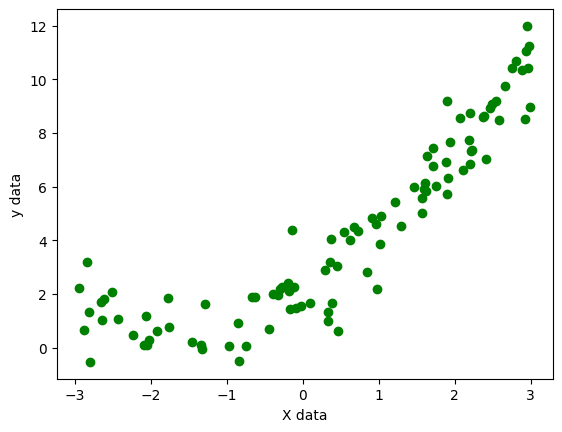

In [3]:
X = 6*np.random.rand(100,1)-3
y = 0.5*X**2 + 1.5*X+2 +np.random.randn(100,1)
plt.scatter(X,y,color='g')
plt.xlabel('X data')
plt.ylabel('y data')
plt.show()

In [4]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
#Linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [6]:
#prdiction
y_pred = lin_reg.predict(X_test)

In [7]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7891655640296238

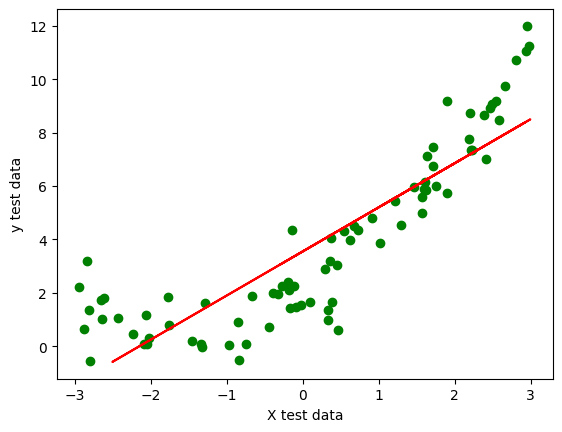

In [8]:
plt.plot(X_test,y_pred,color='r')
plt.scatter(X_train,y_train,color='g')
plt.xlabel('X test data')
plt.ylabel('y test data')
plt.show()

In [9]:
#apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2,include_bias=True)
X_trainPoly = poly_reg.fit_transform(X_train)
X_testPoly = poly_reg.transform(X_test)

In [10]:
X_trainPoly#it gives the bias  x1 and x1^2

array([[ 1.00000000e+00,  1.21149017e+00,  1.46770844e+00],
       [ 1.00000000e+00, -8.40437947e-02,  7.06335943e-03],
       [ 1.00000000e+00,  3.36143399e-01,  1.12992385e-01],
       [ 1.00000000e+00,  9.10224981e-01,  8.28509517e-01],
       [ 1.00000000e+00,  1.60467220e+00,  2.57497287e+00],
       [ 1.00000000e+00, -1.16087165e-01,  1.34762298e-02],
       [ 1.00000000e+00, -4.40218547e-01,  1.93792369e-01],
       [ 1.00000000e+00,  2.18827041e+00,  4.78852740e+00],
       [ 1.00000000e+00, -2.04486343e+00,  4.18146646e+00],
       [ 1.00000000e+00,  1.62088591e+00,  2.62727113e+00],
       [ 1.00000000e+00,  2.58615735e+00,  6.68820984e+00],
       [ 1.00000000e+00, -2.83138291e+00,  8.01672917e+00],
       [ 1.00000000e+00,  5.48787796e-01,  3.01168045e-01],
       [ 1.00000000e+00,  2.38889770e+00,  5.70683221e+00],
       [ 1.00000000e+00,  3.78285837e-01,  1.43100174e-01],
       [ 1.00000000e+00,  2.40692790e+00,  5.79330192e+00],
       [ 1.00000000e+00, -1.38120601e-01

In [11]:
X_testPoly

array([[ 1.        ,  2.06729891,  4.27372479],
       [ 1.        ,  0.9693863 ,  0.9397098 ],
       [ 1.        ,  0.84575096,  0.71529468],
       [ 1.        , -2.50302153,  6.26511677],
       [ 1.        , -1.91784851,  3.67814291],
       [ 1.        , -0.62953789,  0.39631795],
       [ 1.        ,  2.1033916 ,  4.4242562 ],
       [ 1.        ,  1.93329424,  3.73762663],
       [ 1.        ,  0.97393089,  0.94854139],
       [ 1.        , -0.29941094,  0.08964691],
       [ 1.        ,  1.90647334,  3.6346406 ],
       [ 1.        ,  1.8857908 ,  3.55620694],
       [ 1.        ,  2.88314053,  8.31249934],
       [ 1.        ,  2.96572303,  8.79551307],
       [ 1.        ,  2.99483636,  8.96904482],
       [ 1.        ,  2.75365303,  7.58260502],
       [ 1.        ,  2.19723655,  4.82784846],
       [ 1.        ,  2.92841596,  8.57562001],
       [ 1.        ,  1.03013021,  1.06116826],
       [ 1.        ,  2.3760174 ,  5.6454587 ]])

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_trainPoly,y_train)
y_pred = lin_reg.predict(X_testPoly)
score=r2_score(y_test,y_pred)
print(score)

0.8778820090794152


In [13]:
print(lin_reg.coef_)

[[0.         1.63535186 0.48049693]]


In [14]:
print(lin_reg.intercept_)

[2.078145]


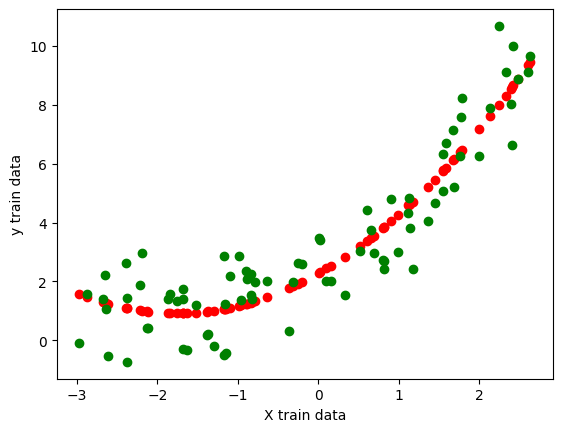

In [ ]:
plt.scatter(X_train,lin_reg.predict(X_trainPoly),color='r')
plt.scatter(X_train,y_train,color='g')
plt.xlabel('X train data')
plt.ylabel('y train data')
plt.show()

In [19]:
#Prediction of new dataset
X_new = np.linspace(-3,3,100).reshape(100,1)
X_newPoly = poly_reg.transform(X_new)
y_new = lin_reg.predict(X_newPoly)

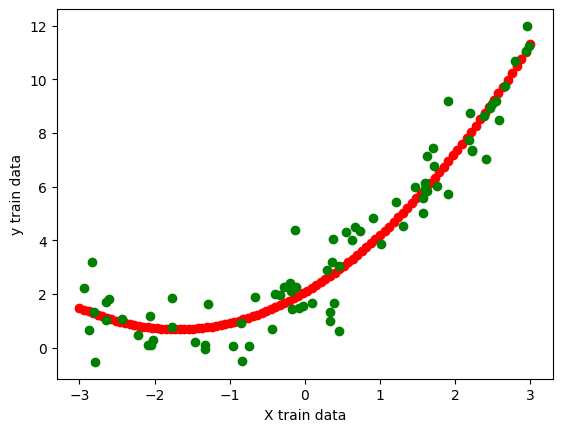

In [20]:
plt.scatter(X_new,y_new,color='r')
plt.scatter(X_train,y_train,color='g')
plt.xlabel('X train data')
plt.ylabel('y train data')
plt.show()

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()


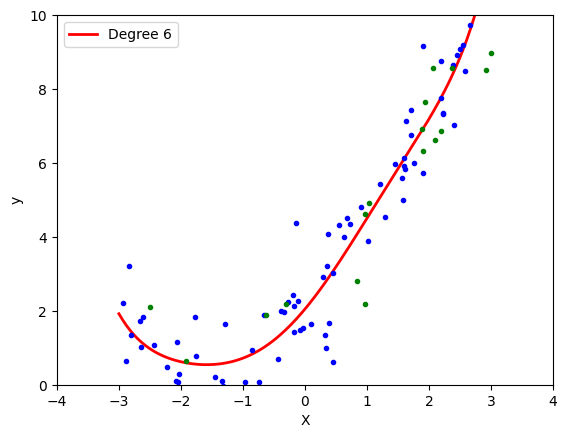

In [23]:
poly_regression(6)